# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 2: Exploratory data analysis

### Goals 

- To increase familiarity with the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To explore (manipulate, summarize, and visualize) datasets. 
- To improve the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.

### Instructions

- This assignment is structured in three parts, using a different dataset for each part.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.

-------------------
## Part 1: The MovieLens 1M dataset

This is a dataset of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata, and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine learning algorithms. 

The MovieLens 1M dataset contains ~1 million ratings collected from ~6,000 users on ~4,000 movies. It's spread across three tables: _ratings_, _user information_, and _movie information_. After extracting the data from the ZIP file (available on Canvas), we can load each table into a pandas DataFrame object using the Python code below.

See:
https://grouplens.org/datasets/movielens/ for additional information.

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
import pandas as pd

Before running the cell below, make sure that you have downloaded the movielens.zip file from Canvas, unzipped it, and placed its contents under the 'data' folder. 

![data/images/movielens_path.png](data/images/movielens_path.png)

In [2]:
# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('data/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('data/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('data/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

In [3]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
1. How many users are stored in the _users_ table and what information is stored for each user?
2. How many movies are stored in the _movies_ table and what information is stored for each movie?
3. How many ratings are stored in the _ratings_ table and what information is stored for each rating?
4. How are users, the movies each user has rated, and the rating related?

*Note*: ages and occupations are coded as integers indicating _groups_ described in the dataset’s README file.

In [6]:
# https://stackoverflow.com/questions/44554253/unable-to-use-unix-shell-commands-in-jupyter-notebook

# Unix System
# !cat 'data/movielens/README'

# Windows System
!type "data\movielens\README"

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

## Solution

In [7]:
# 1. How many users are stored in the users table and what information is stored for each user?

users_user_id = np.array(users['user_id']);
print("The number of users who are stored in the users table is", users_user_id.shape[0]);

print("The information stored for each users:", ', '.join(users.columns.values));

The number of users who are stored in the users table is 6040
The information stored for each users: user_id, gender, age, occupation, zip


In [8]:
# 2. How many movies are stored in the movies table and what information is stored for each movie?

movies_movie_id = np.array(movies['movie_id']);
print("The number of users who are stored in the movies table is", movies_movie_id.shape[0]);

print("The information stored for each movie:", ', '.join(movies.columns.values));

The number of users who are stored in the movies table is 3883
The information stored for each movie: movie_id, title, genres


In [9]:
# 3. How many ratings are stored in the ratings table and what information is stored for each rating?

ratings_rating = np.array(ratings['rating']);
print("The number of users who are stored in the rating table is", ratings_rating.shape[0]);

print("The information stored for each rating:", ', '.join(ratings.columns.values));

The number of users who are stored in the rating table is 1000209
The information stored for each rating: user_id, movie_id, rating, timestamp


In [10]:
# 4. How are users, the movies each user has rated, and the rating related?
print("The users, the movies each users has rated, and the rating are related by the user_id & movie_id")

The users, the movies each users has rated, and the rating are related by the user_id & movie_id


### Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
5. What is the occupation that maps to most of the users? Plot a bar chart of the occupation counts and report the size of the largest bin.
6. What percentage of users are 50 years old or older? Plot a pie chart showing all percentages (per age group) and report the requested value.
7. Which movie received the highest number of ratings (and how were such ratings distributed)?
8. What is the average rating for all movies/users?

## Solution

The occupation that maps to most of the users is college/grad student with 759


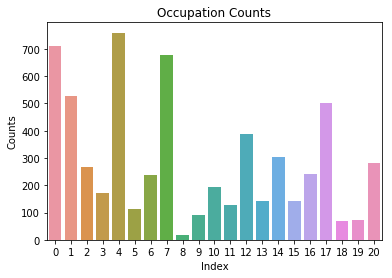

In [11]:
# 5.What is the occupation that maps to most of the users? 
# Plot a histogram of the occupation counts and report the size of the largest bin.

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

occupationLabels = ["other or not specified","academic/educator","artist","clerical/admin",
                    "college/grad student","customer service","doctor/health care",
                    "executive/managerial","farmer","homemaker","K-12 student",
                    "lawyer","programmer","retired","sales/marketing","scientist","self-employed",
                    "technician/engineer","tradesman/craftsman","unemployed","writer"];

occupationLabels = np.array(occupationLabels);
users_occupation = np.array(users['occupation']);

# Using bincount with argmax
# mostOccupation = np.bincount(users_occupation)
# mostOccupationIndex = mostOccupation.argmax();
# print("The occupation that maps to most of the users is", occupationLabels[mostOccupationIndex],
#      "with", mostOccupation[mostOccupationIndex]);


# Using unique with argmax
occupationUnique, occupationCounts = np.unique(users_occupation, return_counts=True);
mostOccupationIndex = np.argmax(occupationCounts);
print("The occupation that maps to most of the users is", occupationLabels[mostOccupationIndex], 
      "with",occupationCounts[mostOccupationIndex]);


# Using unique with boolean Mask
# mostOccupation = occupationUnique[occupationCounts == np.max(occupationCounts)];
# print("The occupation that maps to most of the users is", occupationLabels[mostOccupation[0]],
#    "with",occupationCounts[mostOccupation][0]);

# Using unique with where
# mostOccupation = np.where(occupationCounts == np.max(occupationCounts));
# print("The occupation that maps to most of the users is",  ', '.join(occupationLabels[mostOccupation[0]]),
#      "with",occupationCounts[mostOccupation][0]);

# https://seaborn.pydata.org/generated/seaborn.barplot.html
df = pd.DataFrame();
df['Names'] = occupationLabels;
df['Index'] = occupationUnique;
df['Counts'] = occupationCounts; 
ax = sns.barplot(x="Index", y="Counts", data=df)
ax.set_title('Occupation Counts');

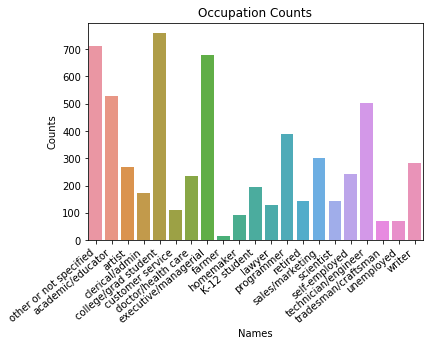

In [12]:
# Plot with names instead of index

# https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
ax = sns.barplot(x="Names", y="Counts", data=df)
ax.set_title('Occupation Counts');
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

The percentage of users are 50 years old or older is 14.5 %


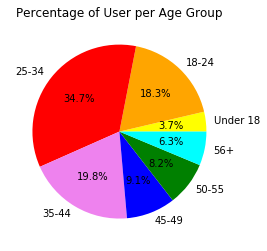

In [13]:
# 6.What percentage of users are 50 years old or older? Plot a pie chart 
# showing all percentages (per age group) and report the requested value.

users_age = np.array(users['age']);
fiftyOlder = users_age[np.where(users_age >= 50)];
percentageFiftyOlder = (fiftyOlder.shape[0] / users_age.shape[0]) * 100;
print("The percentage of users are 50 years old or older is", np.round(percentageFiftyOlder,decimals=2), "%")

ageLabels = ["Under 18","18-24","25-34","35-44","45-49","50-55","56+"];
ageUnique, ageCounts = np.unique(users_age, return_counts=True);

# https://pythonspot.com/matplotlib-pie-chart/
colors = ["yellow", "orange", "red", "violet", "blue", "green", "cyan"];
plt.pie(ageCounts, labels=ageLabels, colors=colors, autopct='%1.1f%%');
plt.title("Percentage of User per Age Group",loc='center');

The movie received the highest number of ratings is American Beauty (1999) with 3428 ratings


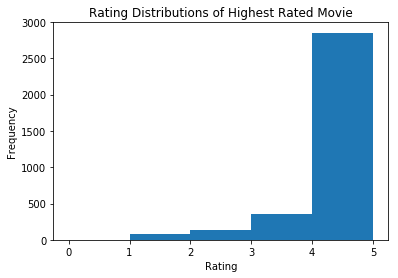

In [14]:
# 7. Which movie received the highest number of ratings (and how were such ratings distributed)?
ratings_movie_id = np.array(ratings['movie_id']);
ratings_rating = np.array(ratings['rating']);

movies_title = np.array(movies['title']);
movies_id = np.array(movies['movie_id']);

ratingUnique, ratingCounts = np.unique(ratings_movie_id, return_counts=True);
ratingMaxCountIndex = np.argmax(ratingCounts);
ratingMovieID = ratingUnique[ratingMaxCountIndex];
ratingTitle = movies_title[movies_id == ratingMovieID];

print("The movie received the highest number of ratings is", ratingTitle[0],
     "with", ratingCounts[ratingMaxCountIndex], "ratings")

# Matplotlib Histogram
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xlim.html
ratingDistribution = ratings_rating[ratings_movie_id == ratingMovieID];
bins = [0,1,2,3,4,5];

plt.hist(ratingDistribution, bins=bins)
plt.title("Rating Distributions of Highest Rated Movie");
plt.xlabel("Rating");
plt.ylabel("Frequency");

In [15]:
# 8. What is the average rating for all movies/users?

# Sum of all the ratings / # of rated movies (users)
ratings_rating = np.array(ratings['rating']);
ratings_rating_total = np.sum(ratings_rating);

print("The average rating for all movies/users is",
      np.round((ratings_rating_total/ratings_rating.shape[0]),decimals=2))

The average rating for all movies/users is 3.58


-------------------
We will use the Python code below to merge all three tables into a unified data frame.

In [16]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


The Python code below will show the top 10 films among female viewers (and, for comparison's sake, the ratings for those movies by male viewers) in decreasing order (highest rated movie on top).

In [17]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Modify the Python code to:
9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
10. Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

## Solution

In [18]:
# 9.Display the top 10 favorite movies among male viewers, 
# selecting only movies with 250 ratings or more.

# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [19]:
# 10. Display the top 10 favorite movies among young viewers (17 years old or younger), 
# selecting only movies with 300 ratings or more.

# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='age', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 300 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 300]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# 17 years old or younger would be the column with age = 1 
top_young_ratings = mean_ratings.sort_values(by = 1, ascending=False)
top_young_ratings[1][:10]

title
Metropolis (1926)              4.888889
GoodFellas (1990)              4.840000
Third Man, The (1949)          4.818182
Double Indemnity (1944)        4.777778
Piano, The (1993)              4.750000
Fried Green Tomatoes (1991)    4.750000
Raging Bull (1980)             4.714286
Roman Holiday (1953)           4.687500
Citizen Kane (1941)            4.680000
Notorious (1946)               4.666667
Name: 1, dtype: float64

### Write Python code to display the most divisive movies (selecting only movies with 250 ratings or more), i.e.:
- The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
- The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

Hint/Convention: ``mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']``

## Solution

In [20]:
# The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.

# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

# Preferred by women
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']
female_diff_ratings = mean_ratings['diff'].sort_values(ascending=False)
female_diff_ratings[:10]

title
Dirty Dancing (1987)                     0.830782
Jumpin' Jack Flash (1986)                0.676359
Grease (1978)                            0.608224
Little Women (1994)                      0.548849
Steel Magnolias (1989)                   0.535777
Anastasia (1997)                         0.518391
Rocky Horror Picture Show, The (1975)    0.512885
Color Purple, The (1985)                 0.498851
Age of Innocence, The (1993)             0.487561
Free Willy (1993)                        0.482573
Name: diff, dtype: float64

In [21]:
# The top 10 movies with the greatest rating difference in the opposite direction (sign) 
# so that we can see which ones were preferred by men.

male_diff_ratings = mean_ratings['diff'].sort_values(ascending=True)
male_diff_ratings[:10]

title
Good, The Bad and The Ugly, The (1966)   -0.726351
Kentucky Fried Movie, The (1977)         -0.676359
Dumb & Dumber (1994)                     -0.638608
Longest Day, The (1962)                  -0.619682
Cable Guy, The (1996)                    -0.613787
Evil Dead II (Dead By Dawn) (1987)       -0.611985
Hidden, The (1987)                       -0.607167
Rocky III (1982)                         -0.581801
Caddyshack (1980)                        -0.573602
For a Few Dollars More (1965)            -0.544704
Name: diff, dtype: float64

### Write Python code to display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification. 

Hint: Disagreement can be measured by the _variance_ or _standard deviation_ of the ratings.

## Solution

In [22]:
# Write Python code to display the top 10 movies (with 250 ratings or more) that elicited 
# the most disagreement among viewers, independent of gender identification.

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
std_ratings = data.pivot_table('rating', index='title', aggfunc=np.std)

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
std_ratings = std_ratings.loc[active_titles]

# Fix naming inconsistency
std_ratings = std_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

# Top 10 Variance Ratings
top_std_ratings = std_ratings.sort_values(by='rating', ascending=False)
top_std_ratings[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


### Write Python code to answer the question: 
What is the most popular movie genre? 
Plot a histogram of the genre counts and report the size of the largest bin.

Hint: use the original **movies** data frame, _before_ the merge!

## Solution

In [23]:
# What is the most popular movie genre? Plot a histogram of the genre counts and report the size of the largest bin.

# Split the genres by the "|"
genres_split =  movies['genres'].str.split('|', expand=True).stack();

# Reset all the index so the splitted has their own index
genres_reset = genres_split.reset_index(drop = True);

# Convert to pandas Dataframe and named the column "genre" to use groupby
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
df_genres_genre = pd.DataFrame(genres_reset, columns = ['genre'])
df_genres_groupby = df_genres_genre.groupby('genre').size().reset_index(name = 'counts')

# Report the size of the largest bin
largestCount = np.max(df_genres_groupby['counts'])
largestBin = df_genres_groupby[df_genres_groupby['counts'] == largestCount]
print('Name of the most popular movie genre and its size: \n', largestBin)

Name of the most popular movie genre and its size: 
    genre  counts
7  Drama    1603


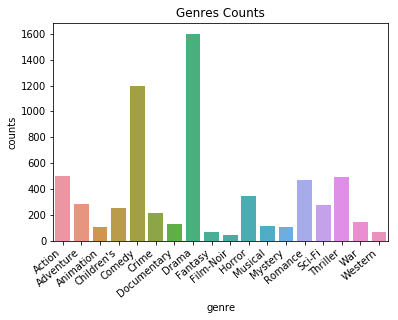

In [24]:
# Plot a histogram of the genre counts
ax = sns.barplot(x="genre", y="counts", data = df_genres_groupby)
ax.set_title('Genres Counts');
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

------------
## Part 2: Titanic

In this part we'll use the dataset of passengers on the *Titanic*, available through the Seaborn library.

See https://www.kaggle.com/c/titanic/data for codebook and additional information.

In [25]:
titanic = sns.load_dataset('titanic')

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Look at the Python code below and answer the following questions (expressing the amounts in "absolute" terms):

11. How many female passengers did not survive (regardless of their class)?
12. How many first class female passengers did not survive?
13. How many male passengers did not survive (regardless of their class)?
14. How many third class male passengers did not survive?

In [28]:
titanic_given = titanic.pivot_table('survived', index='sex', columns='class', margins=True)
titanic_given

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


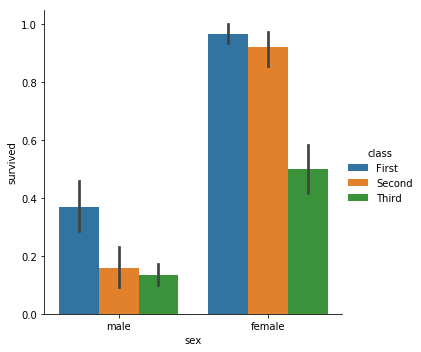

In [29]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

## Solution

In [30]:
titanic_sex = np.array(titanic['sex']);
female = titanic_sex[titanic['sex'] == 'female'];
femaleFirst = titanic_sex[ (titanic['sex'] == 'female') & (titanic['class'] == 'First')];

male = titanic_sex[titanic_sex == 'male'];
maleThird = titanic_sex[ (titanic['sex'] == 'male') & (titanic['class'] == 'Third')];

In [31]:
# 11. How many female passengers did not survive (regardless of their class)?

femaleDeadPercentage = (1 - titanic_given['All']['female']) * 100;
femaleDeadCount = female.shape[0] * femaleDeadPercentage / 100;

print("The percentage of female passengers who did not survive (regardless of their class):",
      np.round(femaleDeadPercentage,decimals=2), "%")
print("The absolute number of female passengers who did not survive (regardless of their class):",
     np.round(femaleDeadCount,decimals=0))

The percentage of female passengers who did not survive (regardless of their class): 25.8 %
The absolute number of female passengers who did not survive (regardless of their class): 81.0


In [32]:
# 12. How many first class female passengers did not survive?

femaleDeadPercentageFirst = (1 - titanic_given['First']['female']) * 100;
femaleDeadCountFirst = femaleFirst.shape[0] * femaleDeadPercentageFirst / 100;

print("The percentage of first class female passengers who did not survive:",
      np.round(femaleDeadPercentageFirst,decimals=2), "%")
print("The absolute number of first class female passengers who did not survive:",
     np.round(femaleDeadCountFirst,decimals=0))

The percentage of first class female passengers who did not survive: 3.19 %
The absolute number of first class female passengers who did not survive: 3.0


In [33]:
# 13. How many male passengers did not survive (regardless of their class)?

maleDeadPercentage = (1 - titanic_given['All']['male']) * 100;
maleDeadCount = male.shape[0] * maleDeadPercentage / 100;

print("The percentage of male passengers who did not survive (regardless of their class):",
      np.round(maleDeadPercentage ,decimals=2), "%")
print("The absolute number of male passengers who did not survive (regardless of their class):",
     np.round(maleDeadCount,decimals=0))

The percentage of male passengers who did not survive (regardless of their class): 81.11 %
The absolute number of male passengers who did not survive (regardless of their class): 468.0


In [34]:
# 14. How many third class male passengers did not survive?

maleDeadPercentageThird = (1 - titanic_given['Third']['male']) * 100;
maleDeadCountFirst = maleThird.shape[0] * maleDeadPercentageThird / 100;

print("The percentage of first class female passengers who did not survive:",
      np.round(maleDeadPercentageThird,decimals=2), "%")
print("The absolute number of first class female passengers who did not survive:",
     np.round(maleDeadCountFirst,decimals=0))

The percentage of first class female passengers who did not survive: 86.46 %
The absolute number of first class female passengers who did not survive: 300.0


### Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

15. How many passengers (absolute number) were there per deck/class? 

(**Hint**: The plot below shows how decks and classes were related and provides a visual estimate.)
16. How many passengers (absolute number) in Deck A survived?
17. How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

![data/images/example_categorical_plot_titanic.png](data/images/example_categorical_plot_titanic.png)

## Solution

In [35]:
# 15.How many passengers (absolute number) were there per deck/class?
titanic_pivot_overall = titanic.pivot_table('survived', index = ['class', 'sex'], 
                                    columns ='deck',margins=True, aggfunc='count', fill_value=0)

print("NOTE: I noticed that when we use pivot_table with either the 'index' or 'column' set to 'deck',");
print("The number did NOT add up correctly due to there are NaN value in the deck column\n\n");   
print("The number of passengers (absolute number) were there per deck/class: \n");
titanic_pivot_overall

NOTE: I noticed that when we use pivot_table with either the 'index' or 'column' set to 'deck',
The number did NOT add up correctly due to there are NaN value in the deck column


The number of passengers (absolute number) were there per deck/class: 



deck            A   B   C   D   E   F  G  All
class  sex                                   
First  female   1  27  27  16  10   0  0   81
       male    14  20  32  13  15   0  0   94
Second female   0   0   0   2   4   4  0   10
       male     0   0   0   2   0   4  0    6
Third  female   0   0   0   0   1   1  4    6
       male     0   0   0   0   2   4  0    6
All            15  47  59  33  32  13  4  203

In [36]:
# 16.How many passengers (absolute number) in Deck A survived?

# Using aggfunc= 'sum' here since only needs to sum up all the 1s (Survived: 0 = No, 1 = Yes)
titanic_pivot_survived = titanic.pivot_table('survived', index='class', columns='deck',
                                             margins=True, aggfunc='sum', fill_value=0)
titanic_pivot_survived

deck,A,B,C,D,E,F,G,All
class,,,,,,,,
First,7,35,35,22,18,0,0,117
Second,0,0,0,3,3,7,0,13
Third,0,0,0,0,3,1,2,6
All,7,35,35,25,24,8,2,136


In [37]:
titanic_DeckA = titanic_pivot_survived['A']
print("The number of passengers (absolute number) in Deck A survived is", titanic_DeckA['All'])

The number of passengers (absolute number) in Deck A survived is 7


In [38]:
# 17.How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

titanic_DeckE = titanic_pivot_survived['E']
print("The number of passengers (absolute number) in Deck E survived is", titanic_DeckE['All']);

print("The breakdown (in Deck E) per class (survived + died):");
titanic_pivot_overall['E']

The number of passengers (absolute number) in Deck E survived is 24
The breakdown (in Deck E) per class (survived + died):


class   sex   
First   female    10
        male      15
Second  female     4
        male       0
Third   female     1
        male       2
All               32
Name: E, dtype: int64

### Write Python code to answer the following questions (using percentage values):
- How many women traveling alone did not survive?
- How many men 35 years old or younger did not survive?
- What was the average fare per class?

## Solution

In [39]:
# How many women traveling alone did not survive?

# Using aggfunc='count' since we are using the 'alive' column for the count 
# Note: Clarification on using 'sex' vs 'who' column in Assignment 2 Discussions

titanic_pivot_Alone = titanic.pivot_table('survived', index= ['sex','alone'], 
                                          columns='alive', margins=True, aggfunc= 'count', fill_value=0)
titanic_pivot_Alone

alive          no  yes  All
sex    alone               
female False   54  134  188
       True    27   99  126
male   False  121   45  166
       True   347   64  411
All           549  342  891

In [40]:
femaleAlonePercentage = titanic_pivot_Alone['no']['female'][1] / titanic_pivot_Alone['All']['female'][1] * 100;

print("The number of women who traveling alone did not survive is", titanic_pivot_Alone['no']['female'][1]);
print("The percentage of women who traveling alone did not survive is",np.round(femaleAlonePercentage,decimals=2),"%");
print("out of the total number of women who traveling alone");     

The number of women who traveling alone did not survive is 27
The percentage of women who traveling alone did not survive is 21.43 %
out of the total number of women who traveling alone


In [41]:
# How many men 35 years old or younger did not survive?
# [include] and (exclude)

# Multi-level pivot tables (03.09-Pivot-Tables.ipynb)
age = pd.cut(titanic['age'], [0, 35, 80])
titanic_pivot_Age = titanic.pivot_table('survived', index=['sex',age], columns='alive', aggfunc= 'count')
titanic_pivot_Age

alive             no  yes
sex    age               
female (0, 35]    48  140
       (35, 80]   16   57
male   (0, 35]   242   67
       (35, 80]  118   26

In [42]:
maleYoungerTotal =  titanic_pivot_Age['no']['male'][0] + titanic_pivot_Age['yes']['male'][0];
maleYoungerPercentage = titanic_pivot_Age['no']['male'][0] / maleYoungerTotal * 100;

print("The number of men 35 years old or younger did not survive", titanic_pivot_Age['no']['male'][0])
print("The percentage of men 35 years old or younger did not survive", np.round(maleYoungerPercentage,decimals=2),"%")
print("out of the total number of men who are 35 years old or younger");

The number of men 35 years old or younger did not survive 242
The percentage of men 35 years old or younger did not survive 78.32 %
out of the total number of men who are 35 years old or younger


In [43]:
# What was the average fare per class?

titanic_pivot_Fare = titanic.pivot_table('fare', columns='class', aggfunc= 'mean')
print("The average fare per class:")
titanic_pivot_Fare

The average fare per class:


class,First,Second,Third
fare,84.154687,20.662183,13.67555


------------
## Part 3: US Baby Names 1880–2018

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. These plain text data files, one per year, contain the total number of births for each sex/name combination. The raw archive of these files can be obtained from http://www.ssa.gov/oact/babynames/limits.html.

After downloading the 'National data' file _names.zip_ and unzipping it, you will have a directory containing a series of files like _yob1880.txt_ through _yob2018.txt_. We need to do some data wrangling to load this dataset (see code below).

For your convenience, I have made the _names.zip_ file available on Canvas. 
Before running the cell below, make sure that you have downloaded it, unzipped it, and placed its contents under the 'data' folder. 

![data/images/names_path.png](data/images/names_path.png)

In [44]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [45]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


### Write Python code to compute the number of baby boys and baby girls born each year and display the two line plots over time. 

Hint: Start by aggregating the data at the year and sex level using ``groupby`` or ``pivot_table``.

Your plot should look like this:

![data/images/birth_vs_year.png](data/images/birth_vs_year.png)

## Solution

In [46]:
# Write Python code to compute the number of baby boys and baby girls born each year

                        # USING GROUPBY()
names_groupby = names.groupby(['sex', 'year']).sum();

print("The number of baby girls born each year: \n", names_groupby['births']['F'])
print("\n\nThe number of baby boys born each year: \n",names_groupby['births']['M'])

The number of baby girls born each year: 
 year
1880      90994
1881      91953
1882     107847
1883     112319
1884     129019
         ...   
2014    1782350
2015    1780453
2016    1766212
2017    1719138
2018    1686961
Name: births, Length: 139, dtype: int64


The number of baby boys born each year: 
 year
1880     110490
1881     100743
1882     113686
1883     104625
1884     114442
         ...   
2014    1916564
2015    1911537
2016    1891585
2017    1842837
2018    1800392
Name: births, Length: 139, dtype: int64


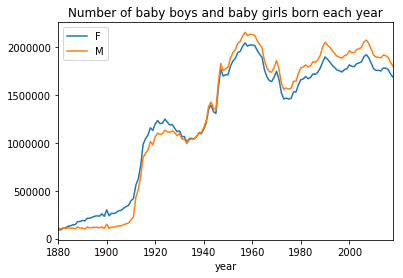

In [47]:
# Display the two line plots over time
df_birth = pd.DataFrame();
df_birth['F'] = names_groupby['births']['F'];
df_birth['M'] = names_groupby['births']['M'];

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html
df_birth.plot.line(title="Number of baby boys and baby girls born each year");

In [48]:
                        # USING PIVOT_TABLE()
names_pivot = names.pivot_table('births', index= 'year', columns='sex', aggfunc='sum')
names_pivot 

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585


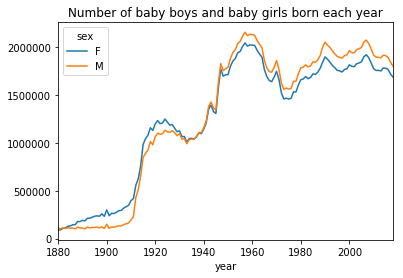

In [49]:
names_pivot.plot.line(title="Number of baby boys and baby girls born each year");

-------------
## Analyzing Naming Trends

Suppose we're interested in analyzing the Top 1000 most popular baby names per year.

We will do so by following these steps:
1. Insert a column _prop_ with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name in a given year. 
2. Group the data by year and sex, then add the new column to each group.
3. Extract a subset of the data (the top 1,000 names for each sex/year combination). This is yet another group operation.
4. Split the Top 1,000 names into the boy and girl portions.
5. Build a pivot table of the total number of births by year and name.

Finally, we will plot the percentage of babies named 'John', 'Noah', 'Madison', or 'Lorraine' over time.

In [50]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [51]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [52]:
# Sanity check (all percentages should add up to 1, i.e., 100%)
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [53]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [54]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [55]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [56]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [57]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6B3EFBBE0>,
      dtype=object)

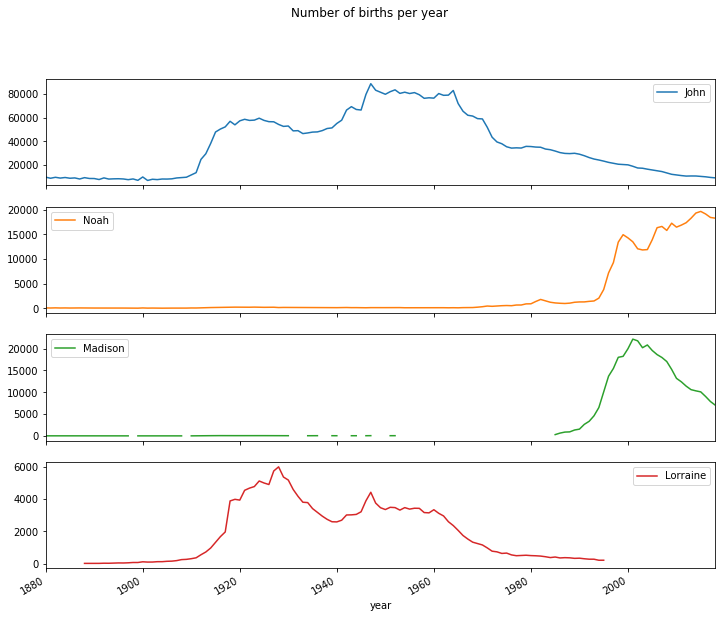

In [58]:
subset = total_births[['John', 'Noah', 'Madison', 'Lorraine']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

--------------
### Write Python code to test the hypothesis:

H1: There has been an increase in naming diversity over time. 

Hint: Compute a metric that consists of the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births, and plot that metric over time.

Your plot should look like this:

![data/images/naming_diversity.png](data/images/naming_diversity.png)

## Solution

In [59]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

# Sorting the names in top 1000 by the 'prop' column (and year)
top1000_sorted = top1000.sort_values(by = ['year','prop'], ascending=False)
top1000_sorted

,name,sex,births,year,prop
275877,Emma,F,18688,2018,0.011078
276877,Liam,M,19837,2018,0.011018
275878,Olivia,F,17921,2018,0.010623
276878,Noah,M,18267,2018,0.010146
275879,Ava,F,14924,2018,0.008847
...,...,...,...,...,...
1937,Cleo,M,5,1880,0.000045
1938,Crockett,M,5,1880,0.000045
1939,Cyril,M,5,1880,0.000045
1940,Daisy,M,5,1880,0.000045


In [60]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html

# Create another DF and add another column for the cumsum (Cummulative Sum)
# Note: Due to the groupby(['year','sex']) => reset back to 0 if change in year or sex

df_top1000_sorted = pd.DataFrame(top1000_sorted);
df_top1000_sorted['cumsum'] = df_top1000_sorted.groupby(['year','sex'])['prop'].cumsum()
df_top1000_sorted

,name,sex,births,year,prop,cumsum
275877,Emma,F,18688,2018,0.011078,0.011078
276877,Liam,M,19837,2018,0.011018,0.011018
275878,Olivia,F,17921,2018,0.010623,0.021701
276878,Noah,M,18267,2018,0.010146,0.021164
275879,Ava,F,14924,2018,0.008847,0.030548
...,...,...,...,...,...,...
1937,Cleo,M,5,1880,0.000045,0.997194
1938,Crockett,M,5,1880,0.000045,0.997240
1939,Cyril,M,5,1880,0.000045,0.997285
1940,Daisy,M,5,1880,0.000045,0.997330


In [61]:
# Reduce down the DF to only have rows that is <= 0.5 of the cumsum (top 50%)
df_top1000_reduce = df_top1000_sorted[df_top1000_sorted['cumsum'] <= 0.5];
df_top1000_reduce

,name,sex,births,year,prop,cumsum
275877,Emma,F,18688,2018,0.011078,0.011078
276877,Liam,M,19837,2018,0.011018,0.011018
275878,Olivia,F,17921,2018,0.010623,0.021701
276878,Noah,M,18267,2018,0.010146,0.021164
275879,Ava,F,14924,2018,0.008847,0.030548
...,...,...,...,...,...,...
32,Ada,F,652,1880,0.007165,0.471833
33,Lillie,F,647,1880,0.007110,0.478944
34,Helen,F,636,1880,0.006989,0.485933
35,Jessie,F,635,1880,0.006978,0.492912


In [62]:
# Pivot_table with aggfunc='count' to count the unique names
pivot_top1000_reduced = df_top1000_reduce.pivot_table('births', index= 'year', columns='sex', aggfunc='count')
pivot_top1000_reduced

sex,F,M
year,,
1880,37,13
1881,37,13
1882,37,14
1883,38,14
1884,38,15
...,...,...
2014,241,130
2015,242,134
2016,248,138


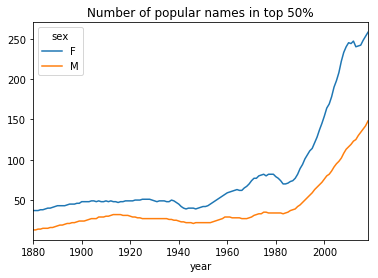

In [63]:
pivot_top1000_reduced.plot.line(title="Number of popular names in top 50%");

-------------
## Boy names that became girl names (and vice versa)

Next, let's look at baby names that were more popular with one sex earlier in the sample but have switched to the opposite sex over the years. One example is the name Lesley or Leslie (or other possible, less common, spelling variations). 

We will do so by following these steps:
1. Go back to the top1000 DataFrame and compute a list of names occurring in the dataset starting with “lesl”.
2. Filter down to just those names and sum births grouped by name to see the relative frequencies.
3. Aggregate by sex and year and normalize within year.
4. Plot the breakdown by sex over time.

In [64]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [65]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [66]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

<Figure size 432x288 with 0 Axes>

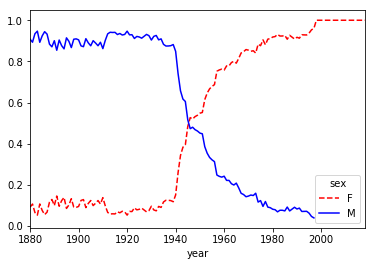

In [67]:
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})

---------------------

Now it's time for you to come up with a different hypotheses, which we will call H2. **Be creative!**

Example: The name 'Reese' has been more prevalent among baby girls than baby boys since 2000.

### Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

In [68]:
print("H2: The name 'Lauren' has been more prevalent among baby girls than baby boys since 1980s.")

H2: The name 'Lauren' has been more prevalent among baby girls than baby boys since 1980s.


In [69]:
all_names = pd.Series(top1000.name.unique())
lauren_like = all_names[all_names.str.lower().str.contains('lauren')]
lauren_like

1241    Laurence
2629      Lauren
3681     Laurene
dtype: object

In [70]:
filtered = top1000[top1000.name.isin(lauren_like)]
filtered.groupby('name').births.sum()

name
Lauren      471882
Laurence     37505
Laurene       1682
Name: births, dtype: int64

In [71]:
lauren_table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
lauren_table = lauren_table.div(table.sum(1), axis=0)

<Figure size 432x288 with 0 Axes>

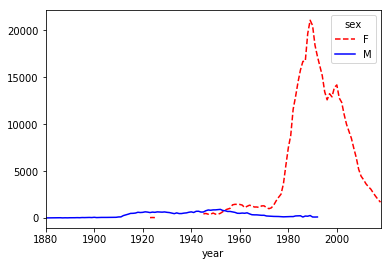

In [72]:
fig = plt.figure()
lauren_table.plot(style={'M': 'b-', 'F': 'r--'})

In [73]:
print("Yes, the hypothesis H2 is confirmed since the name Lauren (and its variations")
print("were 'already' more common on baby girls than baby boys starting around 1960s")

Yes, the hypothesis H2 is confirmed since the name Lauren (and its variations
were 'already' more common on baby girls than baby boys starting around 1960s
